In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
# To load the dataset.
df = pd.read_csv("UK_Accident.csv")
# To get the basic inforation about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [3]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [4]:
#Execute this only once
df['Accident_Severity'] = df['Accident_Severity'].replace([1,2], '1 or 2')
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1 or 2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,1 or 2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,1 or 2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
df = pd.get_dummies(df, columns=['Accident_Severity'])

In [6]:
df = df.drop('Accident_Severity_1 or 2', axis=1)
df.Accident_Severity_3.value_counts(normalize=True)

1    0.851115
0    0.148885
Name: Accident_Severity_3, dtype: float64

In [7]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Accident_Severity_3
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1,1,04/01/2005,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,0
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,1,1,05/01/2005,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,2,1,06/01/2005,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,1
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,1,1,07/01/2005,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,1
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,1,1,10/01/2005,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,1,07/12/2014,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014,0
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,2,2,11/12/2014,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014,1
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,1,1,09/12/2014,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014,1
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,3,2,17/12/2014,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,0


In [8]:
df = df.dropna()

In [9]:
l = LabelEncoder()
rt=l.fit_transform(df["Road_Type"])
jc=l.fit_transform(df["Junction_Control"])
lc=l.fit_transform(df["Light_Conditions"])
wc=l.fit_transform(df["Weather_Conditions"])
rsc=l.fit_transform(df["Road_Surface_Conditions"])
scs=l.fit_transform(df["Special_Conditions_at_Site"])
pchc=l.fit_transform(df["Pedestrian_Crossing-Human_Control"])
pcpf=l.fit_transform(df["Pedestrian_Crossing-Physical_Facilities"])    
ch=l.fit_transform(df["Carriageway_Hazards"])
ti=l.fit_transform(df["Time"])
da=l.fit_transform(df["Date"])
lah=l.fit_transform(df["Local_Authority_(Highway)"])
lsoa=l.fit_transform(df["LSOA_of_Accident_Location"])
po=l.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])

In [10]:
df["Road_Type"] = rt
df["Junction_Control"] = jc
df["Light_Conditions"] = lc
df["Weather_Conditions"] = wc
df["Road_Surface_Conditions"] = rsc
df["Special_Conditions_at_Site"] = scs
df["Pedestrian_Crossing-Human_Control"] = pchc
df["Pedestrian_Crossing-Physical_Facilities"] = pcpf
df["Carriageway_Hazards"] = ch
df["Time"] = ti
df["Date"] = da
df["Local_Authority_(Highway)"] = lah
df["LSOA_of_Accident_Location"] = lsoa
df["Did_Police_Officer_Attend_Scene_of_Accident"] = po

In [11]:
df.isnull().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [12]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("Accident_Index",axis=1)
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Accident_Severity_3
0,525680.0,178240.0,-0.191170,51.489096,1,1,1,324,3,1061,...,4,5,5,3,3,1,1,2839,2005,0
1,524170.0,181650.0,-0.211708,51.520075,1,1,1,432,4,1055,...,2,1,0,3,3,1,1,2899,2005,1
2,524520.0,182240.0,-0.206458,51.525301,1,2,1,540,5,14,...,2,1,0,3,3,1,1,2847,2005,1
3,526900.0,177530.0,-0.173862,51.482442,1,1,1,648,6,634,...,4,1,0,3,3,1,1,2830,2005,1
4,528060.0,179040.0,-0.156618,51.495752,1,1,1,972,2,1272,...,1,1,5,3,3,1,1,2853,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,1,3,98,7,1244,...,0,5,5,3,3,2,1,33981,2014,1
1495357,313050.0,291200.0,-3.282677,52.511702,63,1,2,962,1,1133,...,0,1,0,3,3,2,1,33980,2014,1
1495358,315230.0,326460.0,-3.259644,52.828952,63,2,1,971,3,1194,...,0,5,5,3,3,2,1,35404,2014,1
1495359,303140.0,228320.0,-3.410628,51.944879,63,2,1,2267,1,1119,...,2,8,5,3,3,2,0,33989,2014,1


In [13]:
x = df.iloc[:,df.columns != 'Accident_Severity_3']
y = df.iloc[:,df.columns == 'Accident_Severity_3']

In [14]:
x

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,1,1,324,3,1061,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,1,1,432,4,1055,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,2,1,540,5,14,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,1,1,648,6,634,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,1,1,972,2,1272,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,1,3,98,7,1244,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,1,2,962,1,1133,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,2,1,971,3,1194,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,2,1,2267,1,1119,...,2,2,8,5,3,3,2,0,33989,2014


In [15]:
y

,Accident_Severity_3
0,0
1,1
2,1
3,1
4,1
...,...
1495356,1
1495357,1
1495358,1
1495359,1


In [16]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1395848
Number of rows after drop of duplicates: 1361690


In [17]:
y["Accident_Severity_3"].value_counts(normalize=True)*100

1    85.364667
0    14.635333
Name: Accident_Severity_3, dtype: float64

In [18]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [19]:
X

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.000000,178240.000000,-0.191170,51.489096,1,1,1,324,3,1061,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.000000,181650.000000,-0.211708,51.520075,1,1,1,432,4,1055,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.000000,182240.000000,-0.206458,51.525301,1,2,1,540,5,14,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.000000,177530.000000,-0.173862,51.482442,1,1,1,648,6,634,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.000000,179040.000000,-0.156618,51.495752,1,1,1,972,2,1272,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383117,492590.648557,430348.000000,-0.596949,53.761263,16,1,1,2690,3,983,...,2,4,1,0,3,3,2,1,12934,2013
2383118,347165.652469,460601.210789,-2.808263,54.038670,4,2,1,1042,1,946,...,4,0,1,0,3,3,1,1,32928,2014
2383119,549290.810321,175324.162064,0.147441,51.457160,1,1,1,1431,4,428,...,0,4,1,0,3,3,1,1,355,2010
2383120,387642.760654,391467.245489,-2.187412,53.419848,6,1,1,1219,7,1185,...,2,3,1,0,3,3,1,1,5839,2008


In [20]:
Y

,Accident_Severity_3
0,0
1,1
2,1
3,1
4,1
...,...
2383117,0
2383118,0
2383119,0
2383120,0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=0)

In [22]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scale=MinMaxScaler().fit(x_train)

In [23]:
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_train

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0.870415,0.159297,0.860350,0.162985,0.431579,0.017241,0.01087,0.333029,0.833333,0.646732,...,0.4,1.0,0.125,1.0,0.428571,0.6,1.0,1.0,0.616598,0.666667
1,0.728249,0.353034,0.725360,0.357252,0.157895,0.017241,0.00000,0.015830,1.000000,0.484701,...,0.4,1.0,0.125,0.0,0.428571,0.6,1.0,1.0,0.366111,0.888889
2,0.624409,0.138415,0.611164,0.144849,0.442105,0.017241,0.01087,0.055708,0.666667,0.480529,...,0.4,1.0,0.125,0.6,0.428571,0.6,1.0,1.0,0.459564,0.333333
3,0.530990,0.245287,0.516623,0.251159,0.200000,0.000000,0.00000,0.466362,0.666667,0.646036,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.296014,0.222222
4,0.297988,0.298810,0.272626,0.302567,0.621053,0.017241,0.00000,0.905023,0.333333,0.795549,...,0.4,1.0,0.625,1.0,0.428571,0.6,1.0,1.0,0.946772,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668180,0.565317,0.070350,0.551382,0.077369,0.568421,0.017241,0.00000,0.885540,0.500000,0.666203,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.432738,0.777778
1668181,0.782887,0.148239,0.771261,0.153303,0.000000,0.017241,0.00000,0.448402,0.333333,0.330320,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.078136,0.777778
1668182,0.475418,0.139455,0.461081,0.145895,0.536842,0.000000,0.00000,0.791476,0.333333,0.298331,...,0.4,0.5,0.125,0.0,0.428571,0.6,0.0,1.0,0.412880,0.000000
1668183,0.649833,0.279858,0.640269,0.285217,0.315789,0.000000,0.00000,0.946423,0.500000,0.790682,...,0.8,0.5,0.125,0.6,0.428571,0.6,0.0,1.0,0.936081,0.888889


In [24]:
x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
x_test

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0.838851,0.214727,0.832317,0.218516,0.378947,0.017241,0.0,0.069102,1.000000,0.670376,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.843418,0.222222
1,0.731012,0.136367,0.718422,0.142086,0.463158,0.017241,0.0,0.885845,0.666667,0.461057,...,0.4,1.0,0.625,0.0,0.428571,0.6,0.0,0.0,0.863812,0.444444
2,0.881869,0.149041,0.871118,0.152608,0.431579,0.000000,0.0,0.876408,0.166667,0.175939,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,0.0,0.447406,0.222222
3,0.603429,0.359199,0.593076,0.364215,0.126316,0.017241,0.0,0.090715,0.000000,0.618220,...,0.4,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.328397,0.444444
4,0.785959,0.145318,0.774197,0.150364,0.000000,0.000000,0.0,0.466362,0.166667,0.807371,...,1.0,0.5,0.125,0.0,0.428571,0.6,0.0,0.0,0.121012,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714932,0.741432,0.150147,0.729528,0.155668,0.000000,0.000000,0.0,0.091324,1.000000,0.413074,...,0.8,1.0,0.125,0.0,0.428571,0.6,0.0,1.0,0.071253,0.444444
714933,0.453268,0.365542,0.433378,0.370340,0.031579,0.000000,0.0,0.650533,0.000000,0.528512,...,0.4,1.0,0.125,0.2,0.428571,0.6,1.0,1.0,0.719613,0.666667
714934,0.848819,0.085410,0.833402,0.090002,0.484211,0.000000,0.0,0.870624,0.666667,0.946453,...,0.4,0.0,0.125,1.0,0.428571,0.6,1.0,1.0,0.596937,0.888889
714935,0.411561,0.398479,0.387781,0.402762,0.021053,0.017241,0.0,0.616438,0.500000,0.358136,...,0.4,1.0,0.625,1.0,0.428571,0.6,1.0,1.0,0.544583,0.000000


In [25]:
accuracy = dict()

RANDOM FOREST CLASSIFIER

In [26]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [27]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [28]:
y_pred = model.predict(x_test)
print('Accuracy  of Ranom Forest:',accuracy_score(y_test, y_pred))

Accuracy  of Ranom Forest: 0.8747162337380776


In [29]:
from sklearn.metrics import roc_auc_score

print('Classification Report of RandomForestClassifier:')
print(classification_report(y_test, y_pred))
print('Ranom Forest Score:',roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1]))

Classification Report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87    357588
           1       0.84      0.92      0.88    357349

    accuracy                           0.87    714937
   macro avg       0.88      0.87      0.87    714937
weighted avg       0.88      0.87      0.87    714937

Ranom Forest Score: 0.9381730651654663


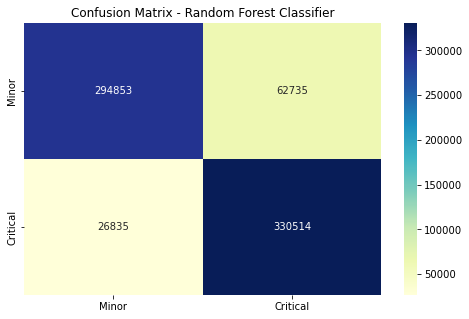

In [30]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Critical"]
columns =  ["Minor", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

 LogisticRegression

In [31]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = LogisticRegression(random_state=0).fit(x, y)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = model.predict(x_test)
print('Accuracy of Logistic REgression:',accuracy_score(y_test, y_pred))

Accuracy of Logistic REgression: 0.6847162756998169


In [33]:
from sklearn.metrics import roc_auc_score

print('Classification Report of Logistic Regression Classifier:')
print(classification_report(y_test, y_pred))
print('Logistic REgression Score:',roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1]))

Classification Report of Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68    357588
           1       0.68      0.68      0.68    357349

    accuracy                           0.68    714937
   macro avg       0.68      0.68      0.68    714937
weighted avg       0.68      0.68      0.68    714937

Logistic REgression Score: 0.7445109009131141


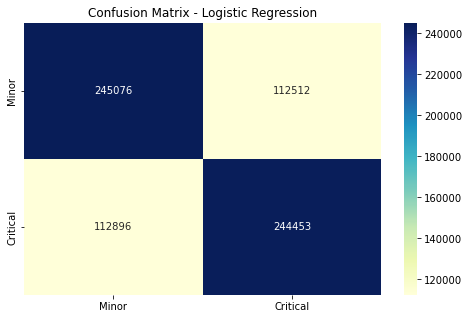

In [34]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Critical"]
columns =  ["Minor", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

DecisionTreeClassifier

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
y_pred = model.predict(x_test)
print('Accuracy of Decision Tree:',accuracy_score(y_test, y_pred))

Accuracy of Decision Tree: 0.8142969240646378


In [37]:
from sklearn.metrics import roc_auc_score

print('Classification Report of Decision Tree Classifier:')
print(classification_report(y_test, y_pred))
print('Decision Tree Score:',roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1]))

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    357588
           1       0.83      0.80      0.81    357349

    accuracy                           0.81    714937
   macro avg       0.81      0.81      0.81    714937
weighted avg       0.81      0.81      0.81    714937

Decision Tree Score: 0.8142904768667971


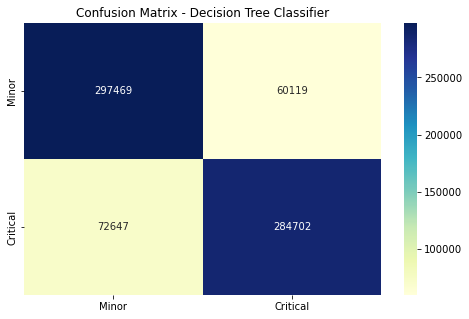

In [38]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Critical"]
columns =  ["Minor", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

XGBClassifier

In [39]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model =XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
y_pred = model.predict(x_test)
print('Accuracy of XGBoost:',accuracy_score(y_test, y_pred))

Accuracy of XGBoost: 0.8460899351970873


In [41]:
from sklearn.metrics import roc_auc_score

print('Classification Report of Decision Tree Classifier:')
print(classification_report(y_test, y_pred))
print('XGBoost Score:',roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1]))

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83    357588
           1       0.80      0.92      0.86    357349

    accuracy                           0.85    714937
   macro avg       0.85      0.85      0.85    714937
weighted avg       0.85      0.85      0.85    714937

XGBoost Score: 0.9138947004643668


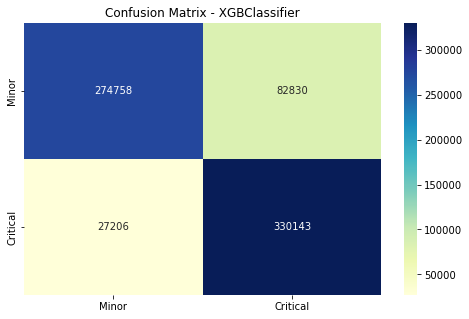

In [42]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Critical"]
columns =  ["Minor", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)

TP = np.diag(confusion_matrix)

TN = confusion_matrix.values.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [43]:
TP = np.diag(cm)
TP

array([274758, 330143], dtype=int64)